<a href="https://colab.research.google.com/github/leta-ha/HUFS-Bigdata-Team-Project/blob/main/big_data_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#코랩에서 파일을 읽어오기 위한 코드
from google.colab import files 
file_uploaded = files.upload()

Saving network-company-data.csv to network-company-data.csv


In [ ]:
#코랩 폰트 다운로드

!apt-get install fonts-nanum*
!apt-get install fontconfig

# import matplotlib as mpl
# import matplotlib.pyplot as plt

# %config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
The following pa

In [ ]:
#그래프 그리기 위한 패키지 임포트

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#소재지 지도에 나타내기

import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geopy.geocoders import Nominatim 
import folium as g

data = pd.read_csv(io.BytesIO(file_uploaded['network-company-data.csv']), encoding='cp949', sep='\t') #파일 읽어오기
address = data['address'] #소재지 데이터만 추출


#주소에서 필요한 부분만 잘라내기 (건물 층 수는 필요 없으므로 삭제)
for i in range(len(address)):
    a = address[i].split(' ')
    address[i] = " ".join(a[0:4])


####### 도로명주소 위도 경도 값으로 바꿔주기 ########
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]
        
#####주소를 위,경도 값으로 변환하기 #####
latitude = []
longitude =[]

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

#주소를 위,경도 값으로 변환한 후 데이터 프레임 생성
address_df = pd.DataFrame({'company': data['name'],'address':data['address'],'latitude':latitude,'longitude':longitude})

#지도의 시작 위치 설정
korea_map = g.Map(location=[37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)


#소재지를 지도에 마커로 나타내기
for i in range(len(address_df)):
  marker01 = g.Marker([address_df.loc[i]['latitude'], address_df.loc[i]['longitude']],
                      icon = g.Icon(color='orange'))
  marker01.add_to(korea_map)
korea_map


<ipython-input-25-a3a72700658e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address[i] = " ".join(a[0:4])


0          경기 성남시 분당구 불정로
1          서울 용산구 한강대로 32
2            서울 중구 을지로 65
3      경기 수원시 팔달구 매산로52번길
4            서울 중구 퇴계로 24
              ...        
116    서울 강남구 테헤란로20길 20,
117       대전 유성구 테크노1로 75
118      서울 금천구 디지털로9길 99
119        서울 중구 서소문로 116
120         서울 송파구 충민로 10
Name: address, Length: 121, dtype: object


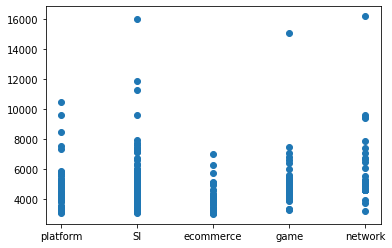

In [ ]:
#연봉 scatter plot으로 나타내기
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

salary = pd.read_csv(io.BytesIO(file_uploaded['salary.csv']), encoding='cp949') #파일 불러오기
df = pd.DataFrame(salary) #데이터 프레임 생성

salary.replace(',','', regex=True, inplace=True) #연봉 정보의 ',' 삭제 ex)1,000
salary = salary.astype({'salary':'int'}) #str으로 들어온 연봉 정보를 int로 변환

plt.scatter(salary['field'], salary['salary']) #scatter plot 사용하여 나타내기
plt.show()

([<matplotlib.patches.Wedge at 0x7f4676840ca0>,
 [Text(0.7407682933602108, 0.8131803831575137, 'AWS'),
  Text(-0.755785195857716, 0.7992426025446305, 'Git'),
  Text(-1.000595210447554, -0.45695648023571733, 'Java'),
  Text(-0.03414230985285849, -1.0994700099038224, 'iOS'),
  Text(0.9468857097809127, -0.5598280562929099, 'React')],
 [Text(0.4040554327419331, 0.44355293626773473, '26.5'),
  Text(-0.412246470467845, 0.4359505104788894, '21.1'),
  Text(-0.5457792056986657, -0.24924898921948216, '18.4'),
  Text(-0.018623078101559172, -0.599710914492994, '17.0'),
  Text(0.5164831144259523, -0.3053607579779508, '17.0')])

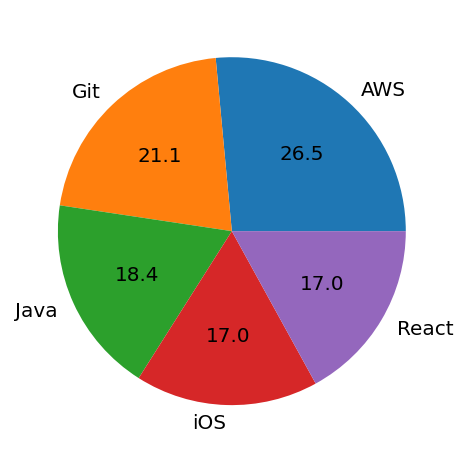

In [ ]:
#IT 기술 트렌드 파이그래프

# io : Python's main facilities for dealing with various types of I/O.
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # os: window 
matplotlib.rcParams['axes.unicode_minus'] = False


skd = pd.read_csv(io.BytesIO(file_uploaded['app-skill-data.csv']), encoding='UTF-8') #파일 불러오기
df = pd.DataFrame(skd) #데이터프레임 생성
sklist = df['앱 개발자'].to_list() ##데이터프레임을 tolist 함수 사용해 리스트로 변경

count = Counter(sklist) #개수 세서 내림차순 정렬
skills = dict(count.most_common()) #딕셔너리로 나타내기

labels = []
values = []
for key, value in skills.items(): #여러 IT 기술들 중 TOP 5 선별
  if len(labels) <= 4:
    labels.append(key)
    values.append(value)

plt.pie(values, labels=labels, autopct='%.1f') #파이그래프 출력 (소수점 첫째자리까지)


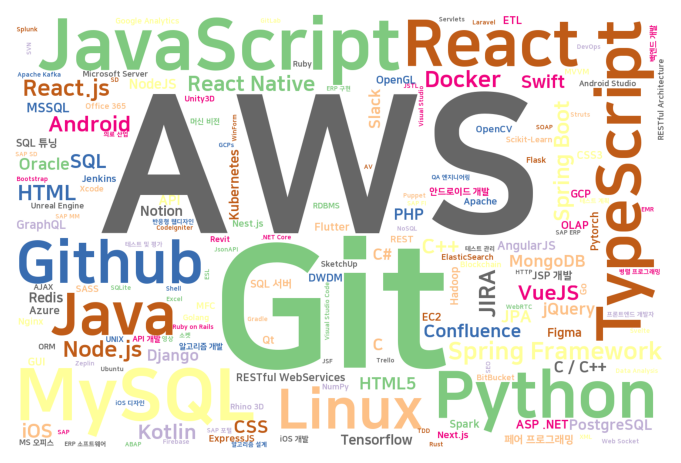

In [ ]:
#IT 기술 트렌드 Word Cloud

import pandas as pd 
from collections import Counter
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# app_skd = pd.read_csv(io.BytesIO(file_uploaded['app-skill-sort.csv']), encoding='cp949')
# skd = pd.read_csv(io.BytesIO(file_uploaded['data-skill-data.csv']))
# skd = pd.read_csv(io.BytesIO(file_uploaded['network-skill-data.csv']))
skd = pd.read_csv(io.BytesIO(file_uploaded['web-skill-data.csv'])) #파일 불러오기
df = pd.DataFrame(skd) #데이터 프레임 생성
sklist = df['웹 개발자'].to_list() #데이터프레임을 tolist 함수 사용해 리스트로 변경

count = Counter(sklist) #개수 세서 내림차순 정렬
skills = dict(count.most_common()) #딕셔너리로 변환
skills


wordcloud = WordCloud(font_path = 'd:/Users/letaleta/Desktop/HUFS/hufs 4-2/Bigdata/teamproject/data/NanumSquareEB.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(skills) #워드클라우드 설정

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

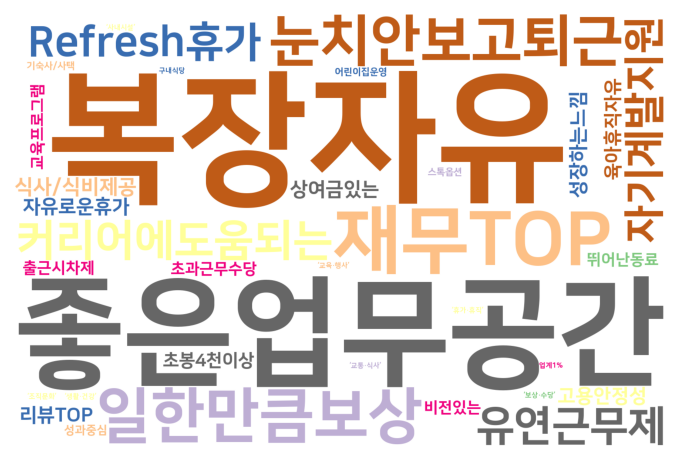

In [ ]:
#복지 트렌드 Word Cloud

import pandas as pd 
from collections import Counter
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

wd = pd.read_csv(io.BytesIO(file_uploaded['game-company-data.csv']), encoding='cp949') #파일 불러오기
df = pd.DataFrame(wd) #데이터 프레임 생성

wlist = df['welfare'].to_list() #dataframe을 tolist 함수 사용해 리스트로 변경

count = Counter(wlist) #개수 세서 내림차순 정렬
welfares = dict(count.most_common()) #딕셔너리로 변환

wordcloud = WordCloud(font_path = 'd:/Users/letaleta/Desktop/HUFS/hufs 4-2/Bigdata/teamproject/data/NanumSquareEB.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(welfares) #워드클라우드 설정

plt.imshow(wordcloud)
plt.axis('off')
plt.show()